In [9]:
# The DiT struggle to fit a single latent vector sequence. Check the latent

a = 'o-3 p-74 d-3'
b = 'o-30 p-74 d-3'
c = 'o-12 p-65 d-3'
import os
import sys
sys.path.append('/home/longshen/work/AccGen/AccGen')
from models.vae_inference import MQVAE_Pos
model = MQVAE_Pos()
a_latent = model.encode_batch([a])
b_latent = model.encode_batch([b])
c_latent = model.encode_batch([c])
# Check cosine similarity
import torch
cos = torch.nn.CosineSimilarity(dim=-1)
sim_ab = cos(a_latent[0], b_latent[0])
print('Cosine similarity between a and b:', sim_ab.item()) 
sim_ac = cos(a_latent[0], c_latent[0])
print('Cosine similarity between a and c:', sim_ac.item())

Using compress_style: first_n_tokens
Adaptive scale: False
Cosine similarity between a and b: 0.7534997463226318
Cosine similarity between a and c: 0.28164225816726685


In [10]:
a = 'b-1'
b = 'o-30 p-72 d-3 p-48 d-12'
c = 'o-30 p-77 d-6 p-48 d-24'

a_latent = model.encode_batch([a])
b_latent = model.encode_batch([b])
c_latent = model.encode_batch([c])
# Check cosine similarity
cos = torch.nn.CosineSimilarity(dim=-1)
sim_ab = cos(a_latent[0], b_latent[0])
sim_ac = cos(a_latent[0], c_latent[0])
print('Cosine similarity between a and b:', sim_ab.item())
print('Cosine similarity between a and c:', sim_ac.item())

Cosine similarity between a and b: -0.10294907540082932
Cosine similarity between a and c: -0.09558285027742386


In [35]:
a = 'b-1'
c = torch.randn(1, 128).squeeze(0)

a_latent = model.encode_batch([a])

# Decode
a_recon = model.decode_batch(a_latent)
print('Reconstructed a:', a_recon)

# Add noise
for i in range(10):
    noisy_latent = a_latent + 2 * torch.randn_like(a_latent)
    a_recon = model.decode_batch(noisy_latent)
    print('Reconstructed a after adding noise:', a_recon)


Latents shape after flatten: torch.Size([1, 128])
Reconstructed a: ['b-1']
Latents shape after flatten: torch.Size([1, 128])
Reconstructed a after adding noise: ['b-1']
Latents shape after flatten: torch.Size([1, 128])
Reconstructed a after adding noise: ['d-12 p-60 d-12 p-55 d-12 p-55 d-12 p-36 d-30 b-1']
Latents shape after flatten: torch.Size([1, 128])
Reconstructed a after adding noise: ['b-1']
Latents shape after flatten: torch.Size([1, 128])
Reconstructed a after adding noise: ['o-24 p-74 d-6 p-67 d-6 p-62 d-6 p-57 d-6 p-55 d-6 p-38 d-6 b-1']
Latents shape after flatten: torch.Size([1, 128])
Reconstructed a after adding noise: ['b-1']
Latents shape after flatten: torch.Size([1, 128])
Reconstructed a after adding noise: ['b-1']
Latents shape after flatten: torch.Size([1, 128])
Reconstructed a after adding noise: ['b-1']
Latents shape after flatten: torch.Size([1, 128])
Reconstructed a after adding noise: ['b-1']
Latents shape after flatten: torch.Size([1, 128])
Reconstructed a aft

In [36]:
a_latent

tensor([[ 1.1787e-02, -1.1703e-03,  2.0570e-02,  5.3235e-03, -5.6383e-03,
          1.2970e-02,  2.6856e-03,  1.8433e-02, -1.8461e-02, -4.9038e-03,
         -2.4872e-03,  1.7144e-02,  1.4315e-02,  3.2403e-03,  2.1393e-02,
         -5.6191e-03,  1.4789e-02,  2.1666e-02,  8.4084e-03, -9.4859e-02,
         -3.5433e-02,  2.7642e-02, -9.9148e-03,  3.0880e-04, -1.2498e-02,
         -2.3304e-02, -1.3183e-02, -1.0782e-02,  5.8576e-03,  1.3872e-02,
         -1.4588e-02,  8.9560e-04, -1.5604e-02,  1.1668e-02,  6.4747e-03,
         -4.3823e-03, -3.5346e-02, -7.0775e-03, -2.6129e-03,  1.2018e-03,
         -2.1146e-04,  6.4393e-03, -1.0450e-02,  2.9169e-02,  3.3089e-04,
         -1.1928e-02,  1.6695e-02, -1.6370e-02,  2.0341e-02, -4.3683e-03,
          4.3482e-03,  1.5302e-02, -1.1476e-02, -3.5777e-03,  1.0720e-02,
         -2.1687e-02, -9.2993e-03, -2.8017e-02, -2.1169e-02,  7.9076e-03,
         -2.2478e-03,  2.6517e-02, -1.4963e-02,  1.0141e-02,  2.5368e-02,
          1.7051e-03,  7.8639e-03,  2.

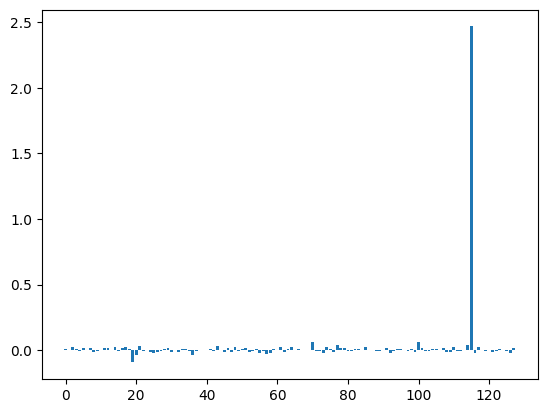

In [37]:
# Plot a_latent as a bar graph
import matplotlib.pyplot as plt
plt.bar(range(a_latent.shape[1]), a_latent.squeeze(0).cpu().numpy())
plt.show()

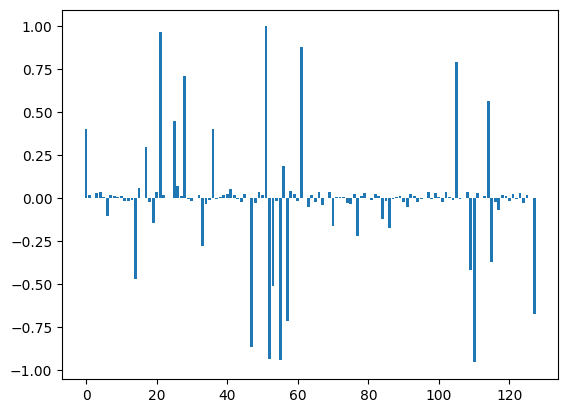

In [38]:
d = 'o-30 p-77 d-3 p-48 d-12'
d_latent = model.encode_batch([d])
# plot d_latent as a bar graph
plt.bar(range(d_latent.shape[1]), d_latent.squeeze(0).cpu().numpy())
plt.show()

In [6]:
out_str = '''o-0 p-86 d-21 p-76 d-3 p-74 d-3 p-40 d-3 <SEP> o-3 p-59 d-3 <SEP> o-6 p-83 d-3 p-76 d-3 p-67 d-3 p-60 d-3 p-57 d-3 <SEP> o-9 p-76 d-12 <SEP> o-12 p-83 d-3 p-68 d-3 p-64 d-3 <SEP> o-15 p-55 d-3 <SEP> o-18 p-83 d-3 p-59 d-6 <SEP> o-21 p-67 d-3 p-64 d-3 p-59 d-3 <SEP> o-24 p-84 d-6 <SEP> o-24 p-81 d-18 p-69 d-18 p-64 d-9 p-45 d-18 <SEP> o-30 p-57 d-9 <SEP> o-33 p-57 d-3 <SEP> o-36 p-88 d-12 p-69 d-3 <SEP> o-39 p-76 d-6 <SEP> o-42 p-83 d-6 p-72 d-6 p-60 d-6 <SEP> o-45 p-69 d-3 p-57 d-3 <SEP> b-1'''
out_str = out_str.strip()
out_str = out_str.replace(' <SEP>', '')
out_str = out_str.replace('\n', '')
from remi_z import MultiTrack
from sonata_utils import create_dir_if_not_exist, jpath
save_dir = '/home/longshen/work/AccGen/test_outputs/ldm/PosLDM/1bar/stable_64d'
create_dir_if_not_exist(save_dir)
mt = MultiTrack.from_remiz_str(out_str)
save_fn = 'step6000.mid'
save_fp = jpath(save_dir, save_fn)
mt.to_midi(save_fp, tempo=90)

MIDI file successfully written to /home/longshen/work/AccGen/test_outputs/ldm/PosLDM/1bar/stable_64d/step6000.mid
